# Example 5.11

Metropolis Hastings on the banana example in Example 5.11. You can download the rice image from [here](riceImage.png).

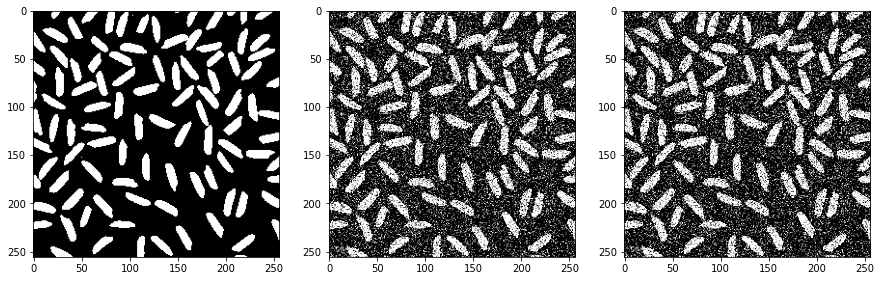

In [6]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(15)

img = plt.imread('riceImage.png')
img = img[:, :, 0]

img[img < 0.5] = -1
img[img >= 0.5] = 1


def likelihood(x, mu, sigma):
    return np.exp(-0.5 * (x - mu) ** 2 / sigma ** 2) / ((sigma * np.sqrt(2 * np.pi)))

N = 10
J = 4

sig = 1
img_noisy = img + sig * rng.normal(size=img.shape)

Y = img_noisy
X = Y.copy() # We initialise X with Y (this is the zeroth state of the Gibbs sampler)

[m, n] = X.shape

# plot the noisy image
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray', vmin=-1, vmax=1)
plt.subplot(1, 3, 2)
plt.imshow(img_noisy, cmap='gray', vmin=-1, vmax=1)
plt.subplot(1, 3, 3)
plt.imshow(X, cmap='gray', vmin=-1, vmax=1)
plt.show()

Now let's implement the Gibbs method as described in the example.

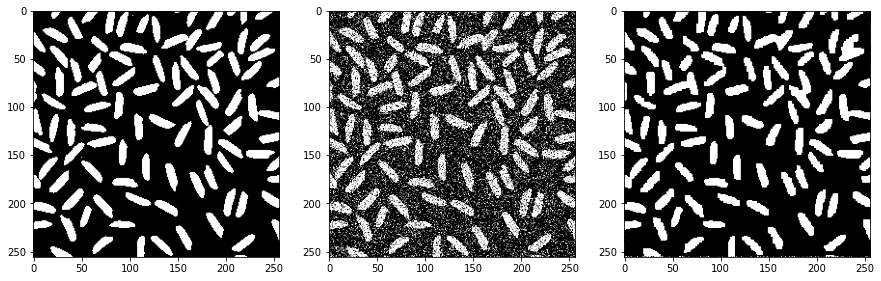

In [11]:
for i in range(N):
    for j in range(1, m-1):
        for k in range(1, n-1):

            # compute log - potential
            int = J * (X[j-1, k] + X[j, k+1] + X[j+1, k] + X[j, k-1])

            # compute two terms in the nornmalising constant
            p1 = np.exp(int) * likelihood(Y[j, k], 1, sig) # p1 is the probability of X[j, k] = 1
            p_1 = np.exp(-int) * likelihood(Y[j, k], -1, sig) # p_1 is the probability of X[j, k] = -1

            # normalize - this is the Bayes rule and pr ends up being two state discrete random variable
            pr = p1 / (p1 + p_1)

            # sample
            if rng.uniform(0, 1) < pr:
                X[j, k] = 1
            else:
                X[j, k] = -1


fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray', vmin=-1, vmax=1)
plt.subplot(1, 3, 2)
plt.imshow(img_noisy, cmap='gray', vmin=-1, vmax=1)
plt.subplot(1, 3, 3)
plt.imshow(X, cmap='gray', vmin=-1, vmax=1)
plt.show()